In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv('advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:

print("Shape:", df.shape)

print("\nInfo:")
print(df.info())

# Unique values per column
print("\nUnique values:")
print(df.nunique())

Shape: (200, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Unique values:
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
correlation_with_target = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation_with_target['Sales'].sort_values(ascending=False))


Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


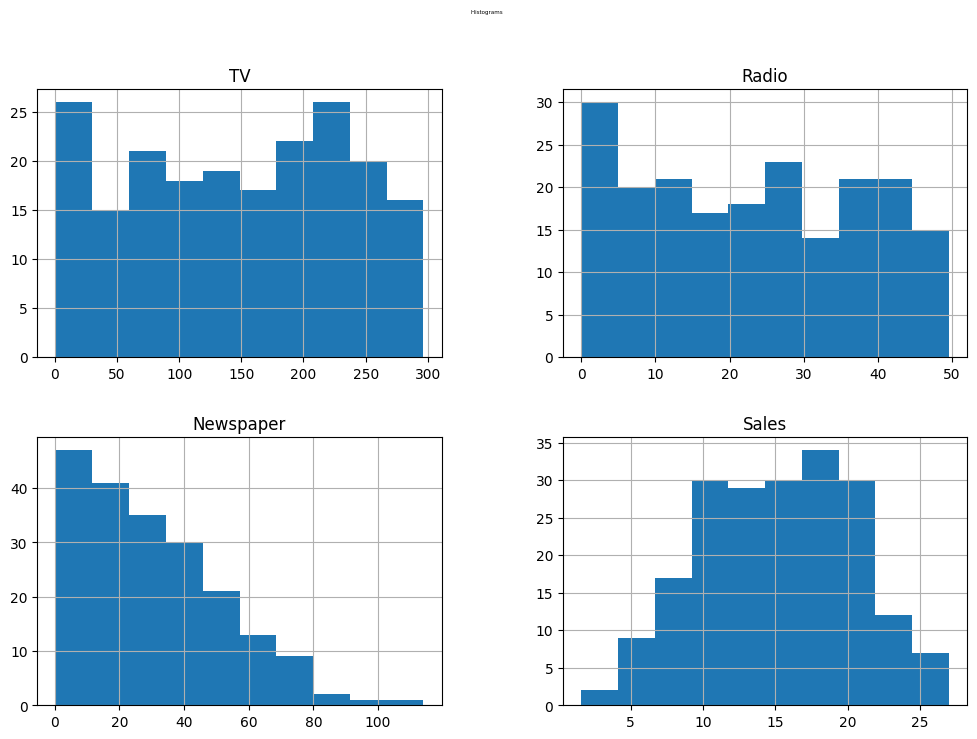

In [ ]:
# Histogram for each numerical column
df.hist(figsize=(12, 8))
plt.suptitle("Histograms ", fontsize=4)
plt.show()


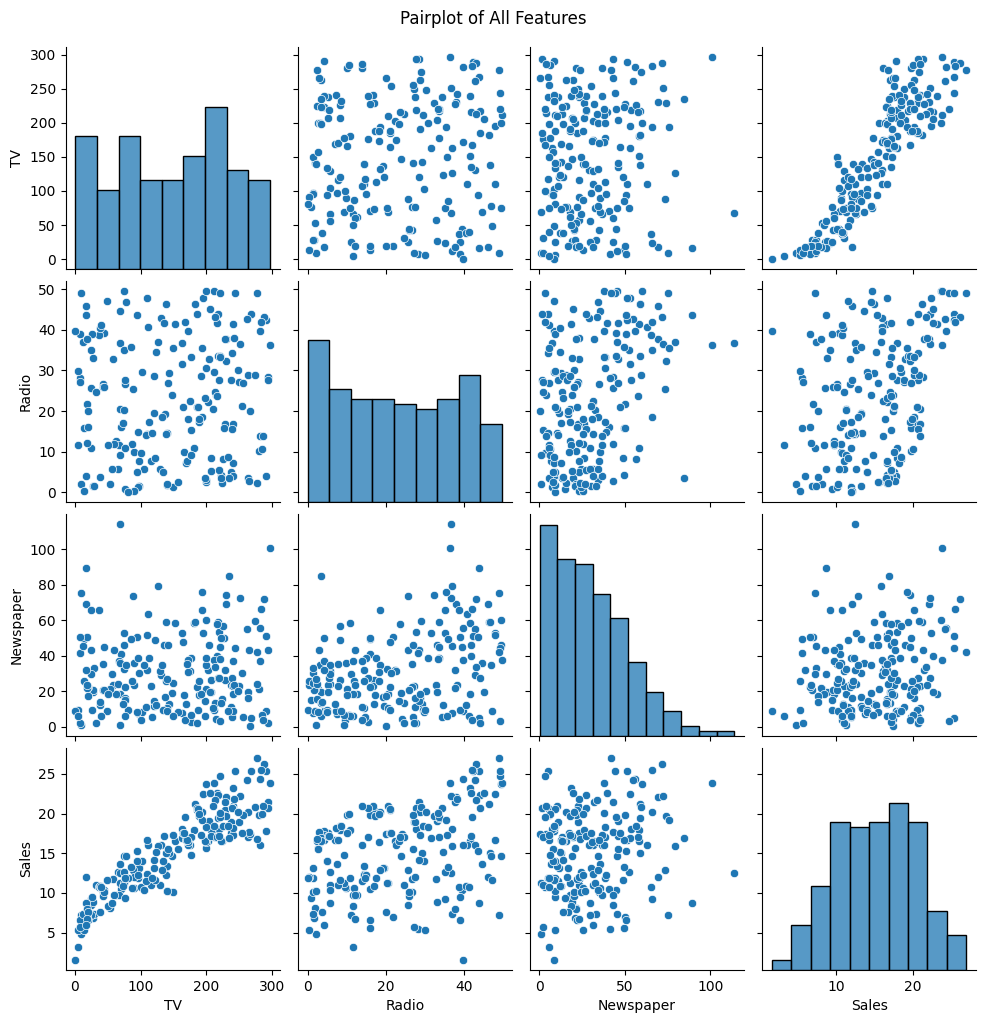

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()


In [ ]:
X = df['TV'].values
y = df['Sales'].values
mean_x = np.mean(X)
mean_y = np.mean(y)

In [ ]:
numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

b1 = numerator / denominator
b0 = mean_y - b1 * mean_x

print("Slope (b1):", b1)
print("Intercept (b0):", b0)

Slope (b1): 0.055464770469558854
Intercept (b0): 6.974821488229894


In [ ]:
y_pred = b0 + b1 * X

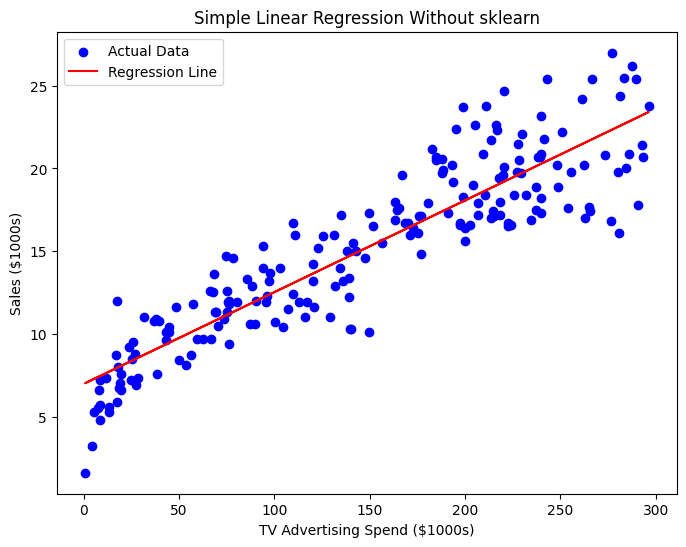

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression Without sklearn")
plt.legend()
plt.show()

In [ ]:
mse = np.mean((y - y_pred) ** 2)
mse

np.float64(0.1878242970012586)

In [ ]:
ss_total = np.sum((y - mean_y) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)

r2 = 1 - (ss_residual / ss_total)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5.2177438977951285
R² Score: 0.8121757029987414


Iteration 0, MSE: 246.7528
Iteration 100, MSE: 9.4658
Iteration 200, MSE: 5.2925
Iteration 300, MSE: 5.2191
Iteration 400, MSE: 5.2178
Iteration 500, MSE: 5.2177
Iteration 600, MSE: 5.2177
Iteration 700, MSE: 5.2177
Iteration 800, MSE: 5.2177
Iteration 900, MSE: 5.2177


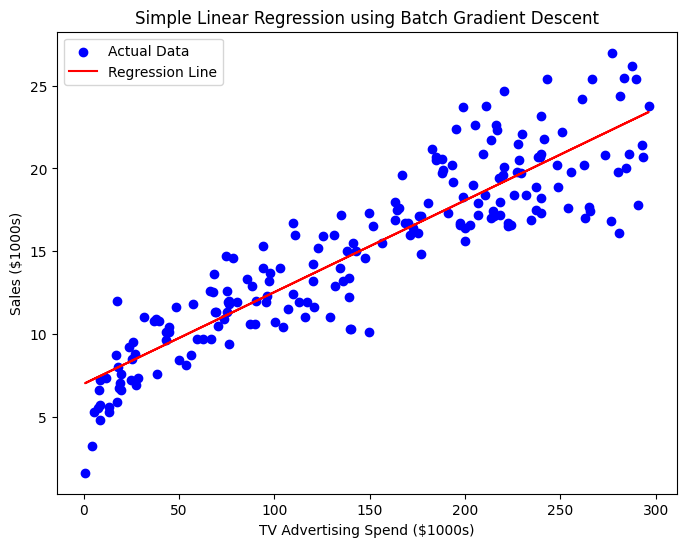

Slope (b1): 0.0555
Intercept (b0): 6.9748


In [36]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

# Feature scaling (important to avoid NaNs in gradient descent)
X_scaled = (X - np.mean(X)) / np.std(X)

# Add bias (X_b = [1, X_scaled])
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros((2, 1))  # [b0, b1]

    for iteration in range(n_iterations):
        gradients = (2 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

        if iteration % 100 == 0:
            mse = np.mean((X.dot(theta) - y) ** 2)
            print(f"Iteration {iteration}, MSE: {mse:.4f}")

    return theta

theta = batch_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000)

y_pred = X_b.dot(theta)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

std_x = np.std(df['TV'])
mean_x = np.mean(df['TV'])

b1_original = theta[1][0] / std_x
b0_original = theta[0][0] - b1_original * mean_x

print(f"Slope (b1): {b1_original:.4f}")
print(f"Intercept (b0): {b0_original:.4f}")

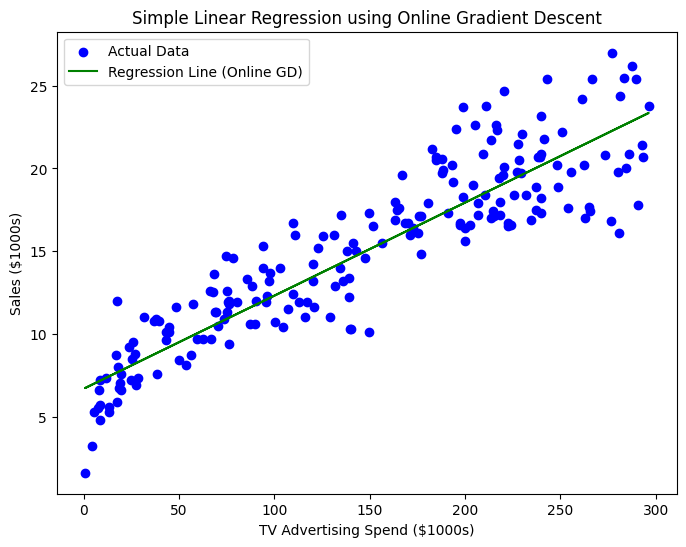

Slope (b1): 0.0563
Intercept (b0): 6.6814


In [31]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

# Feature scaling
X_scaled = (X - np.mean(X)) / np.std(X)

# Add bias term (X_b = [1, X_scaled])
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

# Online Gradient Descent (SGD)
def online_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    m = len(y)
    theta = np.zeros((2, 1))

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

        # Compute and print MSE at end of each epoch
        y_pred = X.dot(theta)
        mse = np.mean((y_pred - y) ** 2)
        print(f"Epoch {epoch+1}, MSE: {mse:.4f}")

    return theta

theta_sgd = online_gradient_descent(X_b, y, learning_rate=0.01, n_epochs=20)

# Predict
y_pred_sgd = X_b.dot(theta_sgd)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_sgd, color='green', label='Regression Line (Online GD)')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Simple Linear Regression using Online Gradient Descent")
plt.legend()
plt.show()

std_x = np.std(df['TV'])
mean_x = np.mean(df['TV'])

b1_original_sgd = theta_sgd[1][0] / std_x
b0_original_sgd = theta_sgd[0][0] - b1_original_sgd * mean_x

print(f"Slope (b1): {b1_original_sgd:.4f}")
print(f"Intercept (b0): {b0_original_sgd:.4f}")

Batch Gradient Descent:
  MSE = 5.2177
  R²  = 0.8122

Online Gradient Descent:
  MSE = 5.2533
  R²  = 0.8109


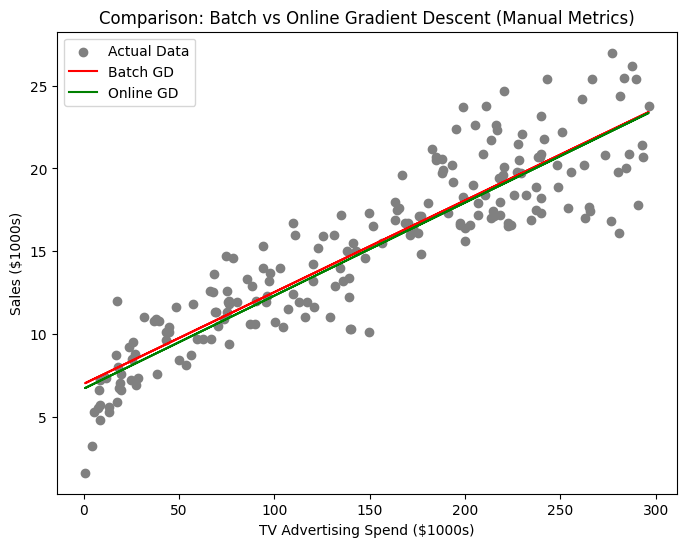

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('advertising.csv')
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

X_scaled = (X - np.mean(X)) / np.std(X)
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.zeros((2, 1))
    for i in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

def online_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    theta = np.zeros((2, 1))
    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Manual MSE and R² functions
def compute_mse(y_true, y_pred):
    errors = y_true - y_pred
    return np.mean(errors ** 2)

def compute_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

theta_batch = batch_gradient_descent(X_b, y)
y_pred_batch = X_b.dot(theta_batch)

theta_online = online_gradient_descent(X_b, y)
y_pred_online = X_b.dot(theta_online)

mse_batch = compute_mse(y, y_pred_batch)
r2_batch = compute_r2(y, y_pred_batch)

mse_online = compute_mse(y, y_pred_online)
r2_online = compute_r2(y, y_pred_online)

print("Batch Gradient Descent:")
print(f"  MSE = {mse_batch:.4f}")
print(f"  R²  = {r2_batch:.4f}")

print("\nOnline Gradient Descent:")
print(f"  MSE = {mse_online:.4f}")
print(f"  R²  = {r2_online:.4f}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='gray', label='Actual Data')
plt.plot(X, y_pred_batch, color='red', label='Batch GD')
plt.plot(X, y_pred_online, color='green', label='Online GD')
plt.xlabel("TV Advertising Spend ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Comparison: Batch vs Online Gradient Descent (Manual Metrics)")
plt.legend()
plt.show()